**SIMULATED ANNEALING ALGORITHM**

**st70 Dataset (Optimal Solution - 675)**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import time

**Define Coordinate Class**

In [2]:
class Coordinate:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    #Calculate Euclidean distance between two coordinates
    @staticmethod
    def get_distance(a, b):
        return math.sqrt((a.x - b.x) ** 2 + (a.y - b.y) ** 2)
    
    #Compute total distance for a given route
    @staticmethod
    def get_total_distance(coords):
        dist = sum(Coordinate.get_distance(a, b) for a, b in zip(coords[:-1], coords[1:]))
        dist += Coordinate.get_distance(coords[0], coords[-1])
        return dist

**Load Dataset**

In [3]:
coordinates = [
    (64, 96), (80, 39), (69, 23), (72, 42), (48, 67), (58, 43), (81, 34), (79, 17),
    (30, 23), (42, 67), (7, 76), (29, 51), (78, 92), (64, 8), (95, 57), (57, 91),
    (40, 35), (68, 40), (92, 34), (62, 1), (28, 43), (76, 73), (67, 88), (93, 54),
    (6, 8), (87, 18), (30, 9), (77, 13), (78, 94), (55, 3), (82, 88), (73, 28),
    (20, 55), (27, 43), (95, 86), (67, 99), (48, 83), (75, 81), (8, 19), (20, 18),
    (54, 38), (63, 36), (44, 33), (52, 18), (12, 13), (25, 5), (58, 85), (5, 67),
    (90, 9), (41, 76), (25, 76), (37, 64), (56, 63), (10, 55), (98, 7), (16, 74),
    (89, 60), (48, 82), (81, 76), (29, 60), (17, 22), (5, 45), (79, 70), (9, 100),
    (17, 82), (74, 67), (10, 68), (48, 19), (83, 86), (84, 94)
]



**Simulated Annealing Algorithm**

In [4]:
#SA params: 
# T0 = initial temperature
# r = cooling rate 
# max_iterations = max number of iterations

def Simulated(T0=40000, r=0.80, max_iterations=1000):

    #Turns dataset into Coordinate objects
    coords = [Coordinate(x, y) for x, y in coordinates]

    best_route = coords[:]
    best_distance = Coordinate.get_total_distance(coords)

    start_time = time.time()
    T = T0

    for _ in range(max_iterations):
        L = np.random.randint(10, 31)
        for _ in range(L):
            r1, r2 = np.random.randint(0, len(coords), size=2) 
            coords[r1], coords[r2] = coords[r2], coords[r1]

            current_distance = Coordinate.get_total_distance(coords) #swap cities

            #Acceptance probability
            if current_distance < best_distance or np.random.uniform() < np.exp((best_distance - current_distance) / T):
                best_distance = current_distance
                best_route = coords[:]
            else:
                coords[r1], coords[r2] = coords[r2], coords[r1] #revert swap

        T *= r
    
    best_route.append(best_route[0])

    end_time = time.time()
    cpu_time = end_time - start_time

    best_tour_indices = [coordinates.index((c.x, c.y)) for c in best_route]

    print(f"Best Tour: {best_tour_indices}")
    print(f"Best Length: {best_distance:.2f}")
    print(f"CPU Time: {cpu_time:.4f} seconds")

    fig, ax = plt.subplots(figsize=(10, 6))

    for first, second in zip(best_route[:-1], best_route[1:]):
        ax.plot([first.x, second.x], [first.y, second.y], 'b')
    ax.plot([best_route[0].x, best_route[-1].x], [best_route[0].y, best_route[-1].y], 'b')

    for i, c in enumerate(best_route):
        ax.plot(c.x, c.y, 'ro')
        ax.text(c.x + 1, c.y + 1, f'{i}', color='black', fontsize=8)

    ax.set_title('Simulated Annealing for Symmetric TSP')
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')
    plt.show()


Implementations

1st

Best Tour: [67, 2, 7, 31, 6, 58, 12, 28, 69, 30, 68, 34, 14, 54, 48, 27, 43, 39, 44, 24, 45, 26, 29, 19, 13, 25, 18, 23, 56, 62, 65, 5, 20, 33, 11, 52, 21, 37, 22, 63, 64, 10, 55, 3, 1, 17, 41, 40, 42, 16, 32, 59, 51, 9, 4, 49, 57, 36, 46, 35, 0, 15, 50, 66, 47, 53, 61, 38, 60, 8, 67]
Best Length: 1097.32
CPU Time: 2.1415 seconds


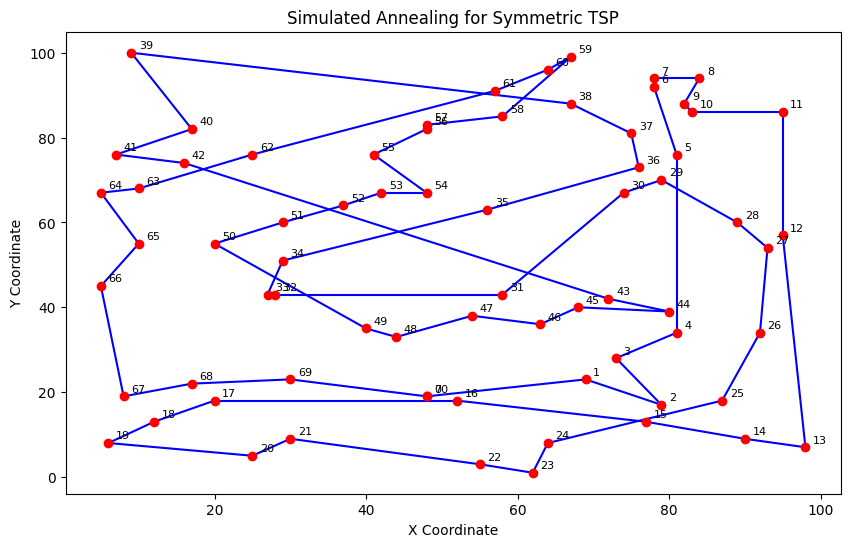

In [5]:
Simulated()

2nd

Best Tour: [4, 9, 66, 10, 47, 53, 33, 20, 42, 27, 48, 54, 7, 2, 31, 6, 1, 3, 65, 21, 5, 17, 41, 40, 43, 67, 16, 11, 59, 51, 57, 36, 50, 55, 64, 63, 46, 37, 22, 35, 0, 15, 49, 32, 61, 60, 8, 19, 29, 26, 39, 38, 24, 44, 45, 13, 25, 18, 14, 34, 69, 28, 12, 30, 68, 58, 62, 56, 23, 52, 4]
Best Length: 1079.05
CPU Time: 2.4848 seconds


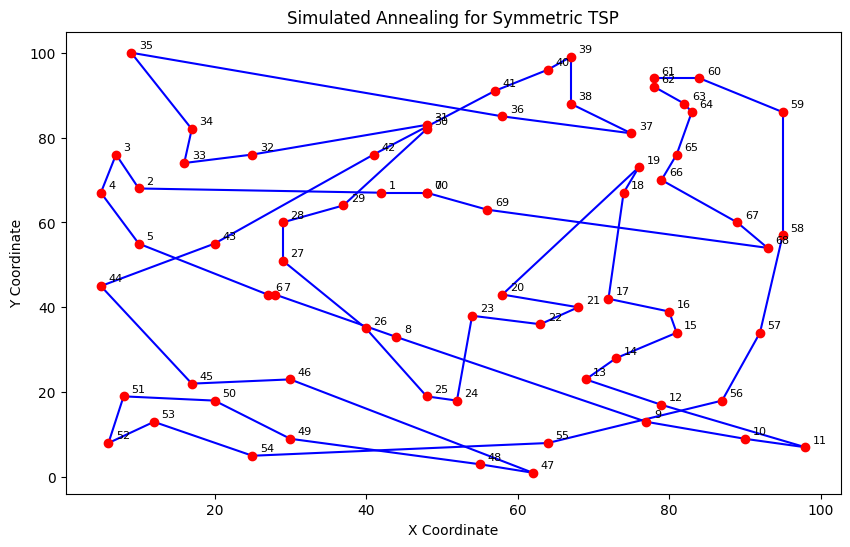

In [6]:
Simulated()

3rd

Best Tour: [36, 50, 55, 53, 61, 20, 41, 17, 3, 1, 31, 2, 18, 23, 14, 56, 34, 69, 12, 30, 68, 58, 21, 62, 65, 49, 64, 63, 10, 47, 66, 32, 11, 33, 60, 39, 26, 45, 44, 24, 38, 8, 16, 42, 40, 5, 37, 28, 35, 0, 9, 51, 59, 67, 43, 29, 19, 13, 27, 7, 48, 54, 25, 6, 52, 4, 57, 46, 22, 15, 36]
Best Length: 971.57
CPU Time: 2.5882 seconds


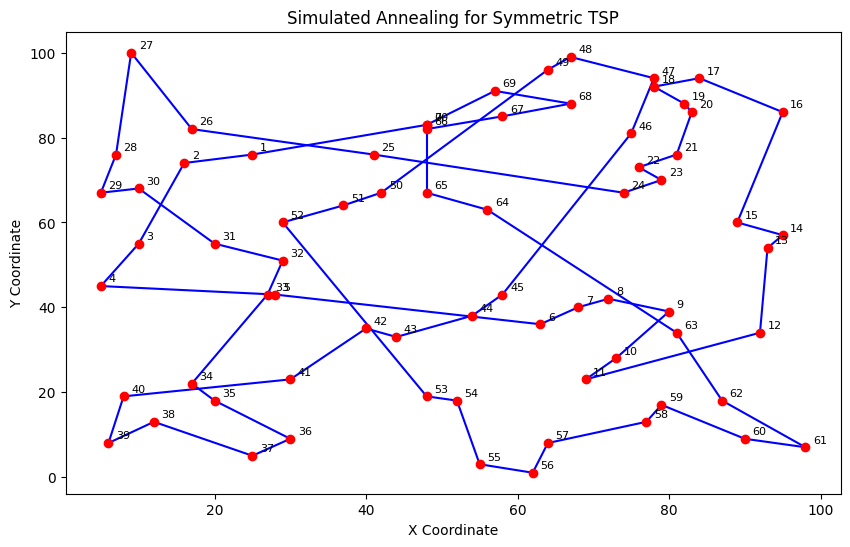

In [7]:
Simulated()

4th

Best Tour: [7, 40, 11, 32, 33, 20, 16, 42, 5, 17, 1, 6, 31, 2, 3, 21, 37, 4, 9, 51, 59, 55, 66, 47, 53, 60, 39, 45, 44, 24, 38, 61, 10, 63, 35, 0, 15, 36, 64, 50, 49, 57, 30, 68, 58, 25, 48, 54, 18, 14, 34, 69, 28, 12, 22, 46, 8, 26, 67, 41, 23, 56, 62, 65, 52, 43, 29, 19, 13, 27, 7]
Best Length: 1183.44
CPU Time: 1.9899 seconds


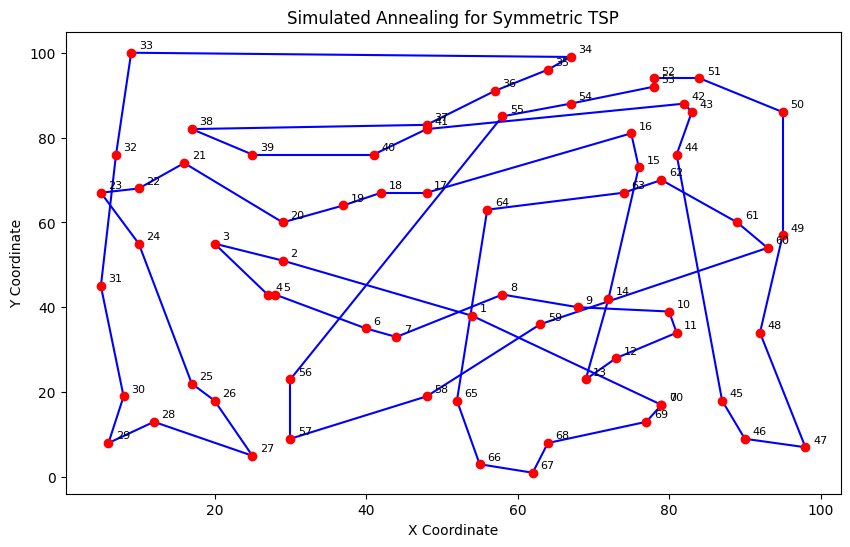

In [8]:
Simulated()

5th

Best Tour: [2, 31, 6, 7, 25, 18, 23, 62, 21, 46, 36, 57, 50, 55, 32, 20, 16, 42, 40, 52, 4, 5, 41, 17, 3, 1, 65, 37, 68, 58, 56, 14, 54, 48, 27, 19, 29, 11, 59, 51, 49, 9, 43, 67, 26, 45, 39, 60, 33, 15, 22, 12, 30, 34, 69, 28, 35, 0, 63, 64, 10, 66, 47, 53, 61, 38, 24, 44, 8, 13, 2]
Best Length: 1101.08
CPU Time: 2.4850 seconds


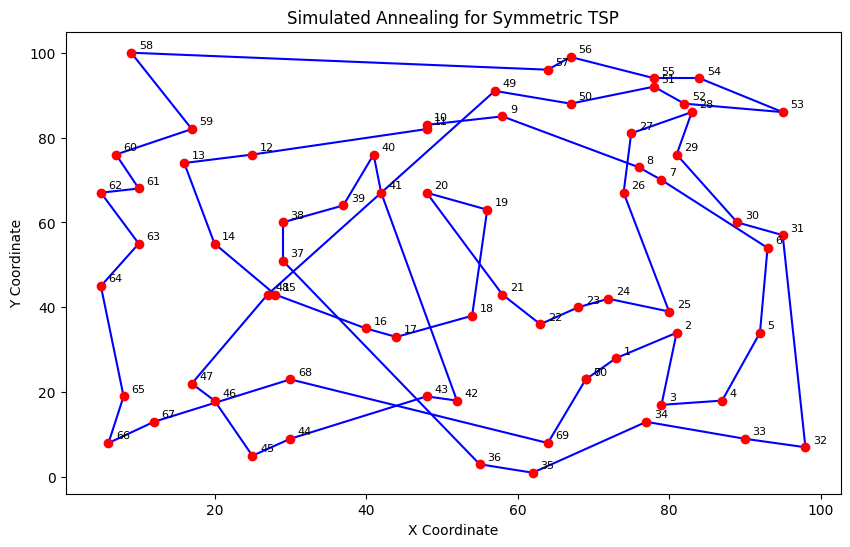

In [9]:
Simulated()

6th

Best Tour: [39, 60, 11, 49, 36, 15, 22, 62, 56, 14, 23, 5, 40, 20, 33, 53, 47, 10, 63, 0, 35, 28, 12, 68, 58, 41, 43, 29, 19, 13, 2, 17, 3, 1, 18, 54, 48, 26, 45, 44, 24, 38, 61, 66, 55, 64, 50, 32, 59, 51, 9, 4, 65, 21, 46, 57, 42, 67, 27, 7, 25, 31, 6, 34, 69, 30, 37, 52, 16, 8, 39]
Best Length: 1157.27
CPU Time: 1.9047 seconds


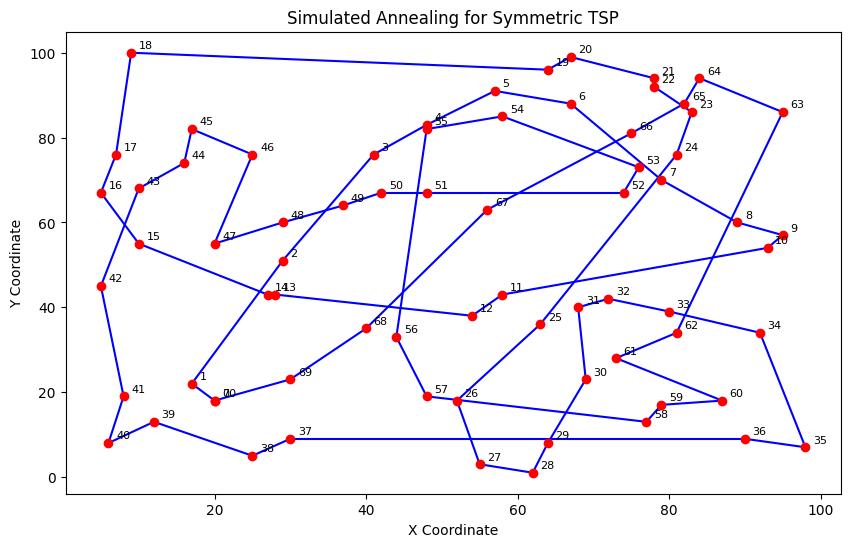

In [10]:
Simulated()

7th

Best Tour: [17, 6, 1, 56, 65, 62, 58, 21, 52, 4, 9, 51, 49, 57, 46, 22, 69, 34, 14, 23, 18, 25, 7, 27, 31, 2, 26, 45, 44, 24, 38, 60, 39, 8, 67, 43, 13, 48, 54, 19, 29, 20, 33, 32, 61, 53, 47, 66, 10, 55, 59, 11, 16, 42, 40, 41, 5, 50, 64, 63, 36, 15, 0, 35, 28, 12, 30, 68, 37, 3, 17]
Best Length: 949.22
CPU Time: 1.8430 seconds


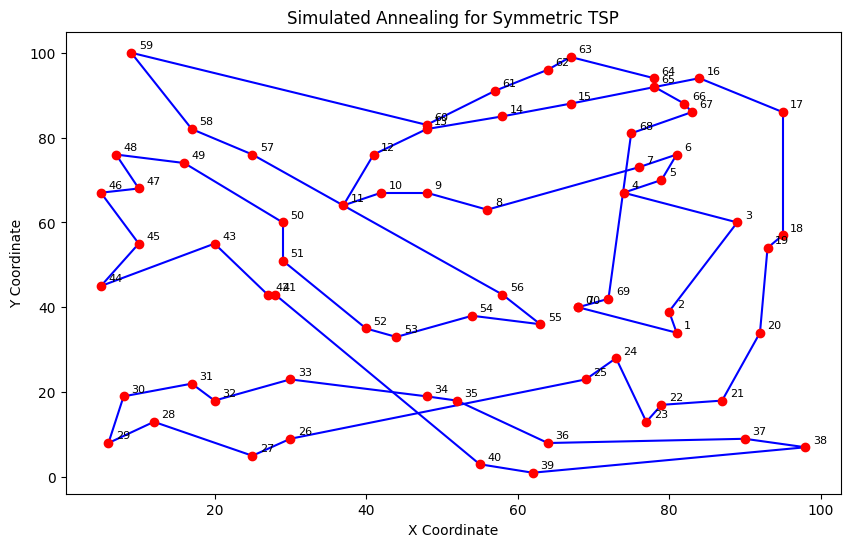

In [11]:
Simulated()

8th

Best Tour: [48, 54, 18, 1, 34, 69, 28, 12, 30, 68, 60, 38, 24, 44, 45, 26, 40, 17, 3, 6, 7, 27, 42, 67, 43, 29, 19, 13, 2, 31, 41, 5, 11, 59, 32, 53, 66, 10, 55, 64, 46, 22, 37, 58, 21, 65, 52, 16, 8, 39, 20, 33, 61, 47, 63, 15, 0, 35, 56, 14, 23, 62, 36, 57, 49, 50, 51, 9, 4, 25, 48]
Best Length: 1150.70
CPU Time: 1.6990 seconds


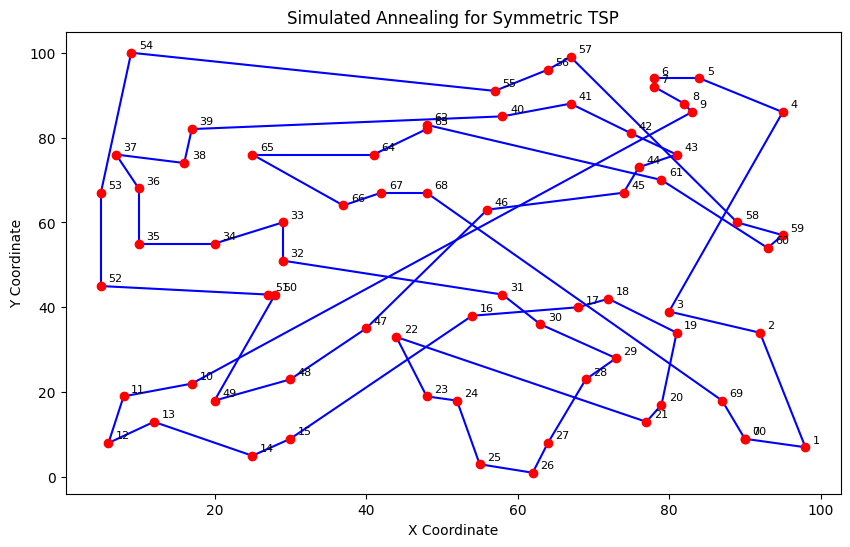

In [12]:
Simulated()

9th

Best Tour: [69, 34, 58, 62, 56, 14, 23, 18, 13, 29, 19, 48, 54, 25, 7, 27, 2, 31, 6, 65, 21, 37, 68, 30, 12, 28, 22, 15, 63, 10, 47, 32, 11, 5, 17, 3, 1, 52, 4, 36, 57, 49, 55, 66, 53, 61, 38, 24, 44, 60, 39, 8, 45, 26, 67, 43, 41, 40, 42, 16, 20, 33, 59, 64, 50, 51, 9, 46, 0, 35, 69]
Best Length: 930.45
CPU Time: 2.8774 seconds


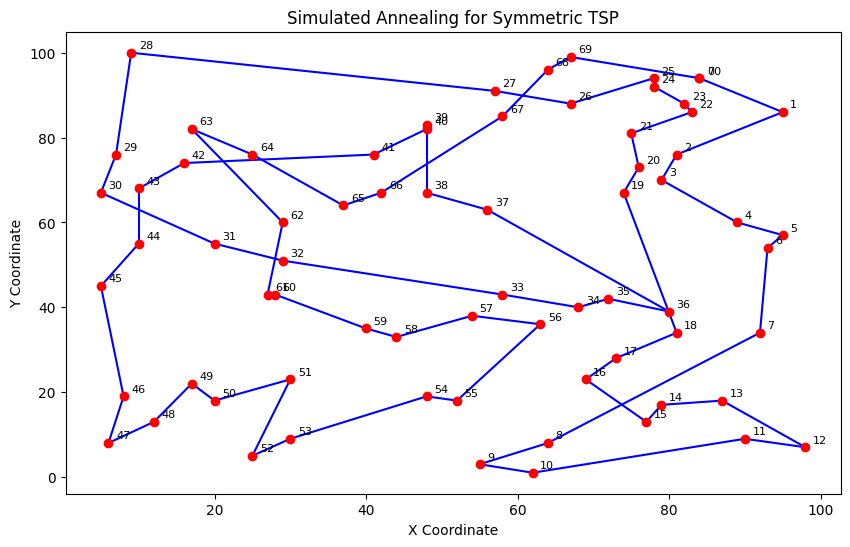

In [13]:
Simulated()

10th

Best Tour: [8, 39, 26, 45, 44, 24, 38, 60, 61, 53, 47, 66, 10, 50, 49, 57, 36, 46, 63, 64, 55, 32, 16, 42, 13, 19, 29, 43, 67, 37, 12, 28, 22, 15, 0, 35, 69, 30, 68, 34, 58, 48, 54, 18, 23, 14, 56, 3, 17, 41, 5, 4, 9, 51, 40, 31, 2, 27, 7, 25, 6, 1, 65, 62, 21, 52, 59, 11, 20, 33, 8]
Best Length: 1011.36
CPU Time: 1.7997 seconds


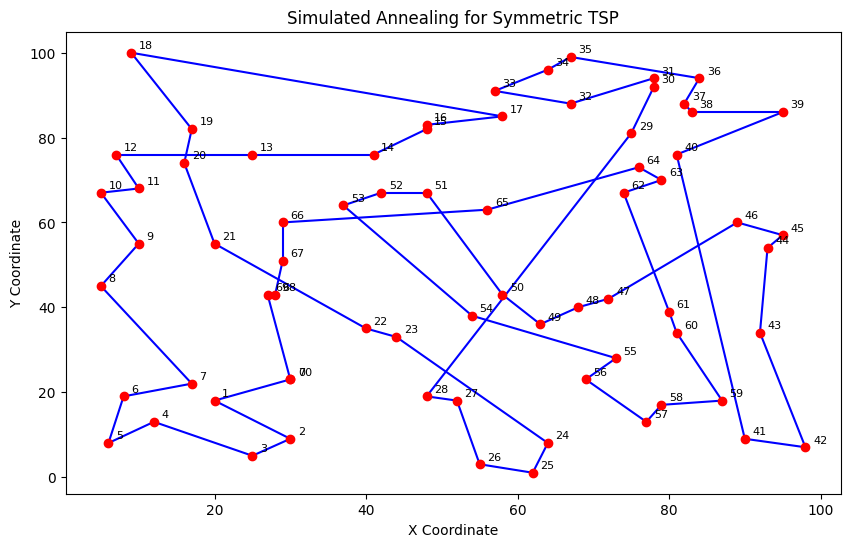

In [14]:
Simulated()